In [2]:
import nibabel as nib
from nilearn.plotting import plot_prob_atlas, plot_stat_map
from nilearn.image import iter_img
from nilearn.decomposition import CanICA

In [3]:
# Load the functional image
data_img = nib.load("../data/preprocessed/sub-control01/func/coregistered_fmri_to_mni.nii.gz")

In [ ]:
# RUN ICA
n_components = 1
ica = CanICA(n_components=n_components)
ica.fit(data_img)

/opt/anaconda3/envs/fmri_preprocessing_env/lib/python3.9/site-packages/nilearn/signal.py:261: UserWarning: Detrending of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn(
/opt/anaconda3/envs/fmri_preprocessing_env/lib/python3.9/site-packages/nilearn/signal.py:74: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn(
/var/folders/gq/01wd3qp173d43h5n7q75rykc0000gn/T/ipykernel_11121/674737719.py:4: UserWarning: Nilearn's decomposition module obtained a critical threshold (= 0.0 percentile).
No threshold will be applied. Threshold should be decreased or number of components should be adjusted.
  ica.fit(data_img)


CanICA(n_components=1)

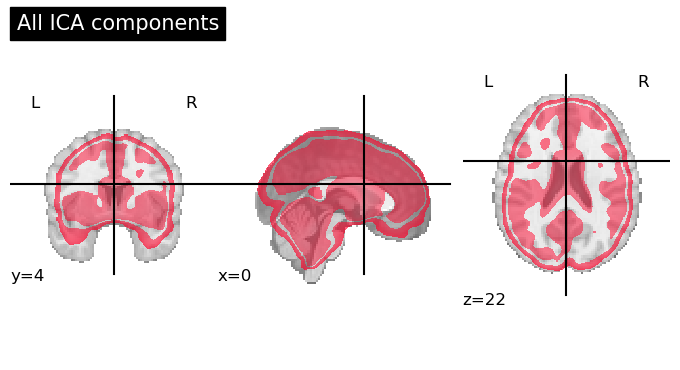

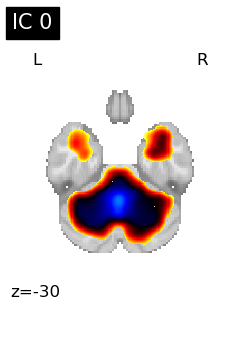

In [7]:
# Retrieve the independent components in brain space
components_img = ica.components_img_
# Plot all ICA components together
plot_prob_atlas(components_img, title='All ICA components')

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(
        cur_img,
        display_mode="z",
        title=f"IC {int(i)}",
        cut_coords=1,
        colorbar=False,
    )